# **❤️ Heart Failure Clinical Records: EDA & Machine Learning**

## **📌 Introduction**

Heart failure is one of the leading causes of mortality worldwide and poses a significant challenge to modern healthcare systems.  
Early identification of high-risk patients can help clinicians make timely decisions and improve patient survival outcomes.

In this notebook, we perform a **comprehensive Exploratory Data Analysis (EDA)** followed by **Machine Learning modeling** on the **Heart Failure Clinical Records dataset**.  
The goal is to **analyze key clinical factors** and **predict patient survival** using data-driven techniques.

---

## **🎯 Objectives**

- 🔍 Understand the structure and quality of the dataset  
- 📊 Identify key clinical features influencing patient survival  
- 🧠 Perform meaningful EDA to guide model selection  
- 🤖 Build and evaluate machine learning models for mortality prediction  
- 📈 Compare model performance using appropriate metrics (ROC-AUC)

---

## **🗂 Dataset Overview**

- 📁 **Total Records:** 299 patients  
- 🧪 **Clinical Features:** 12  
- 🎯 **Target Variable:** `DEATH_EVENT`  
  - `0` → Patient Survived  
  - `1` → Patient Died  
- 🏥 Data collected from real clinical records

---

## **⚙️ Workflow**

1. 📦 Data Loading & Inspection  
2. 🔍 Exploratory Data Analysis (EDA)  
3. 🧹 Feature Understanding & Relationships  
4. 🤖 Machine Learning Model Training  
5. 🏆 Model Evaluation & Comparison  
6. 🧠 Insights & Conclusions  

---

## 🚀** Why This Notebook?**

This notebook is designed to be:
- ✅ Beginner-friendly  
- ✅ Medically interpretable  
- ✅ Machine learning focused  
- ✅ Suitable for academic and Kaggle projects  

Whether you are a **data science student**, **ML practitioner**, or **healthcare analytics enthusiast**, this notebook aims to provide both **clarity and practical value**.

---

📌 *Let’s dive into the data and uncover insights that matter!*  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
sns.set_style('dark')
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (8, 5)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction-dataset/heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# **🧠 Target Variable Distribution**

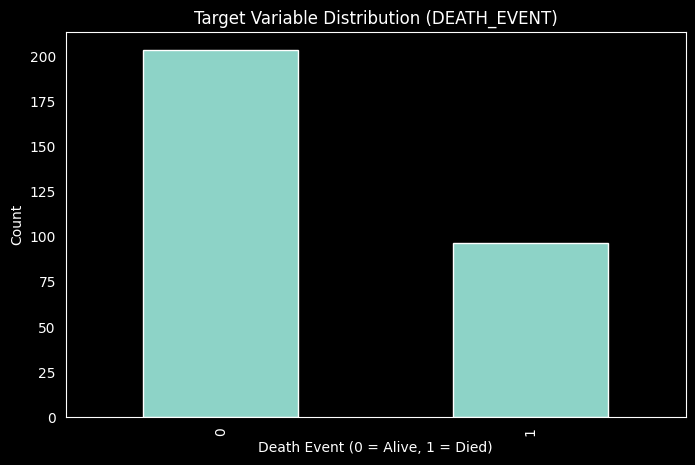

In [6]:
df['DEATH_EVENT'].value_counts().plot(
    kind='bar',
    title='Target Variable Distribution (DEATH_EVENT)'
)
plt.xlabel('Death Event (0 = Alive, 1 = Died)')
plt.ylabel('Count')
plt.show()

# **🎂 Age Distribution**

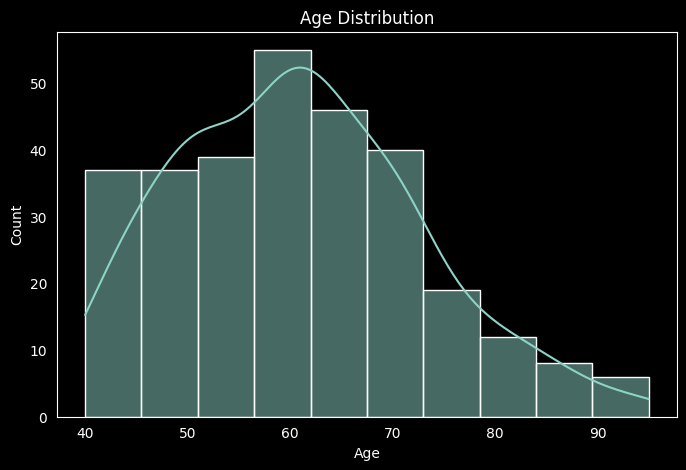

In [7]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# **🎂 Age vs Death Event**

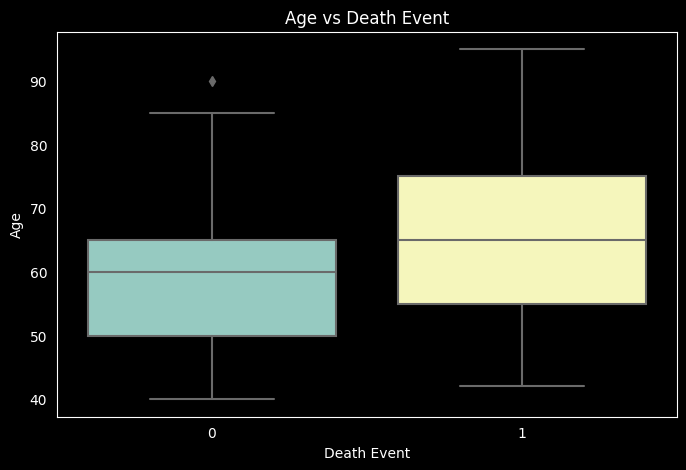

In [8]:
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age vs Death Event')
plt.xlabel('Death Event')
plt.ylabel('Age')
plt.show()

# **⏱ Time vs Death Event**

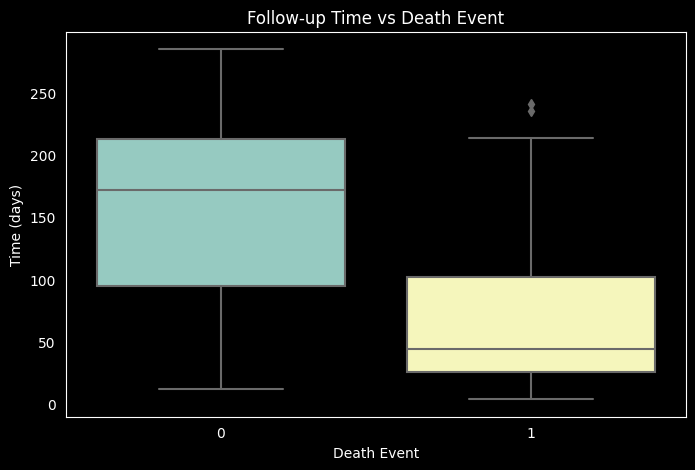

In [9]:
sns.boxplot(x='DEATH_EVENT', y='time', data=df)
plt.title('Follow-up Time vs Death Event')
plt.xlabel('Death Event')
plt.ylabel('Time (days)')
plt.show()

# **❤️ Ejection Fraction Distribution**

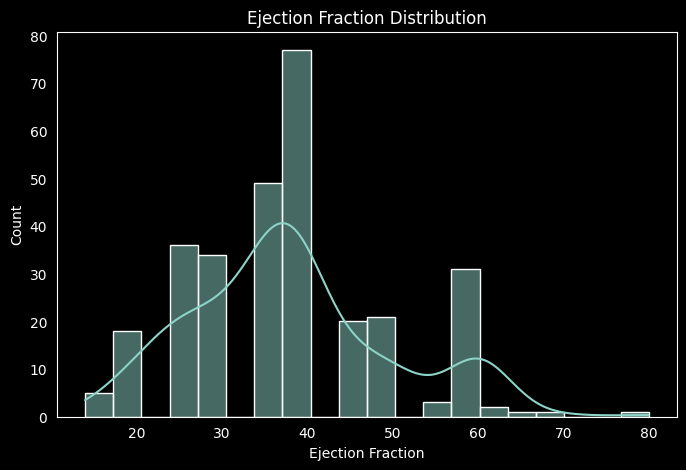

In [10]:
sns.histplot(df['ejection_fraction'], bins=20, kde=True)
plt.title('Ejection Fraction Distribution')
plt.xlabel('Ejection Fraction')
plt.show()

# **❤️ Ejection Fraction vs Death Event**

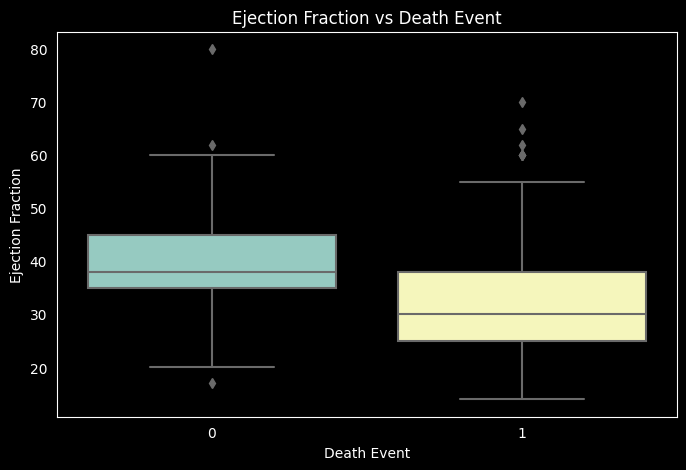

In [11]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.title('Ejection Fraction vs Death Event')
plt.xlabel('Death Event')
plt.ylabel('Ejection Fraction')
plt.show()

# **🧪 Serum Creatinine Distribution**

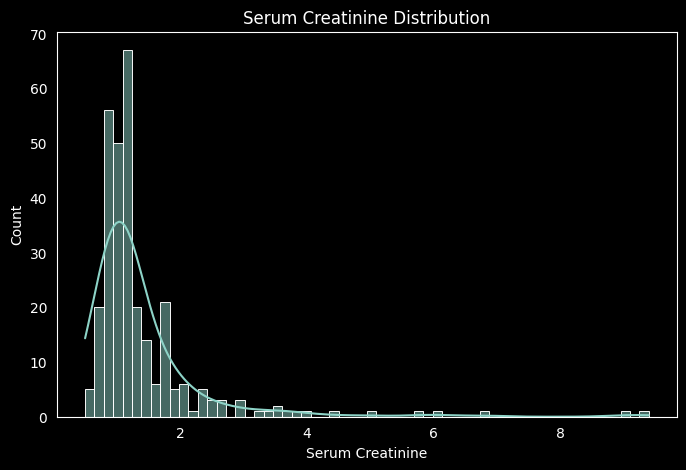

In [12]:
sns.histplot(df['serum_creatinine'], kde=True)
plt.title('Serum Creatinine Distribution')
plt.xlabel('Serum Creatinine')
plt.show()

# **🧪 Serum Creatinine vs Death Event**

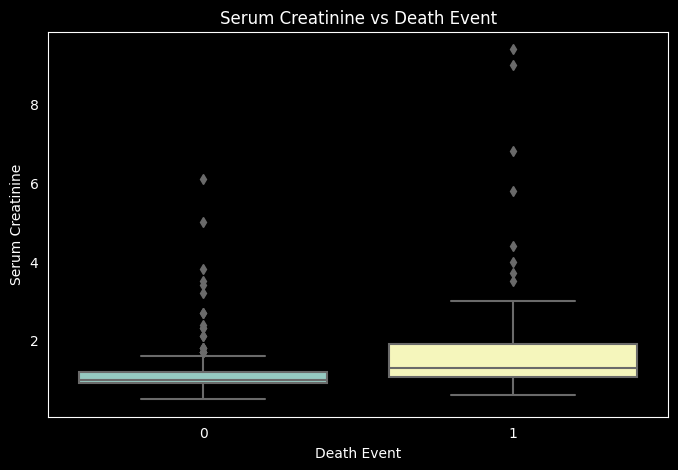

In [13]:
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine vs Death Event')
plt.xlabel('Death Event')
plt.ylabel('Serum Creatinine')
plt.show()

# **🧂 Serum Sodium vs Death Event**

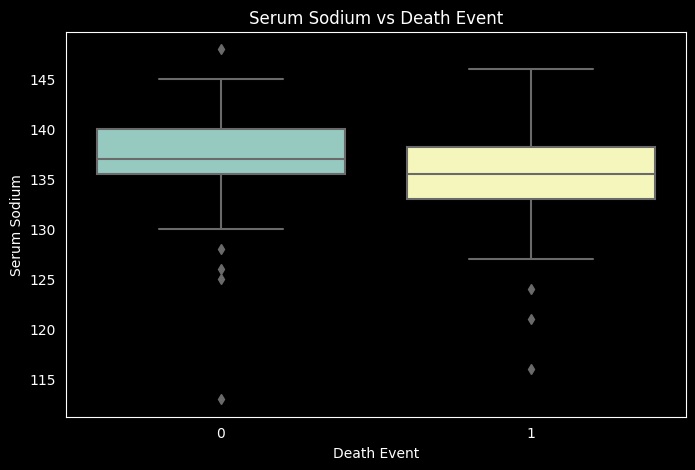

In [14]:
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', data=df)
plt.title('Serum Sodium vs Death Event')
plt.xlabel('Death Event')
plt.ylabel('Serum Sodium')
plt.show()

# **🩸 Platelets Distribution**

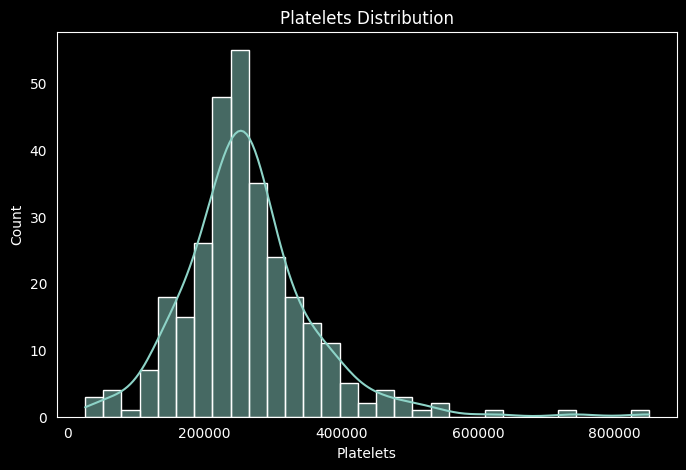

In [15]:
sns.histplot(df['platelets'], kde=True)
plt.title('Platelets Distribution')
plt.xlabel('Platelets')
plt.show()

# **🩺 Binary Features vs Death Event**

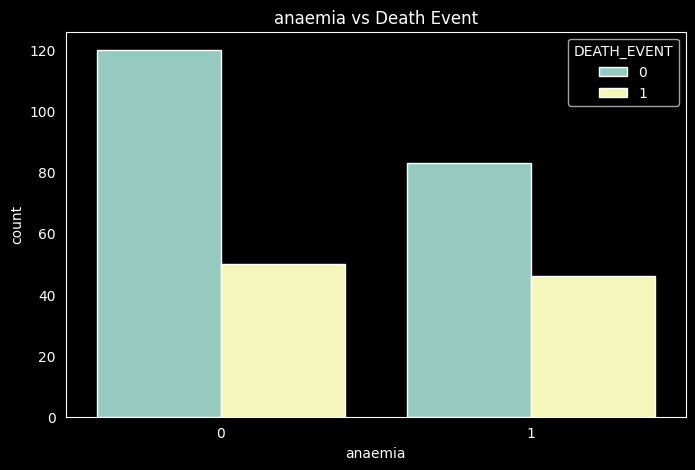

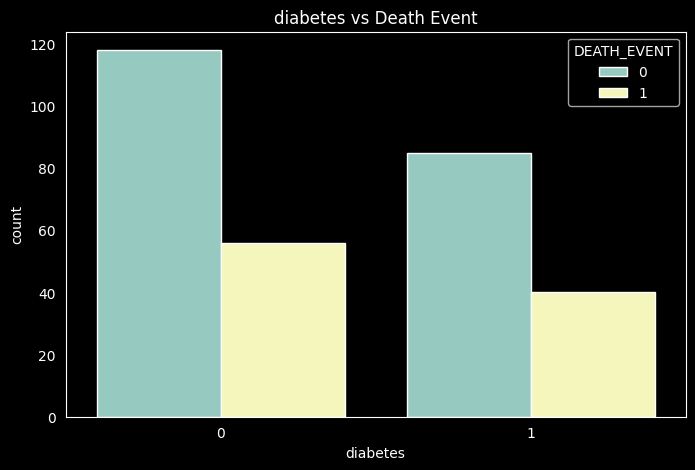

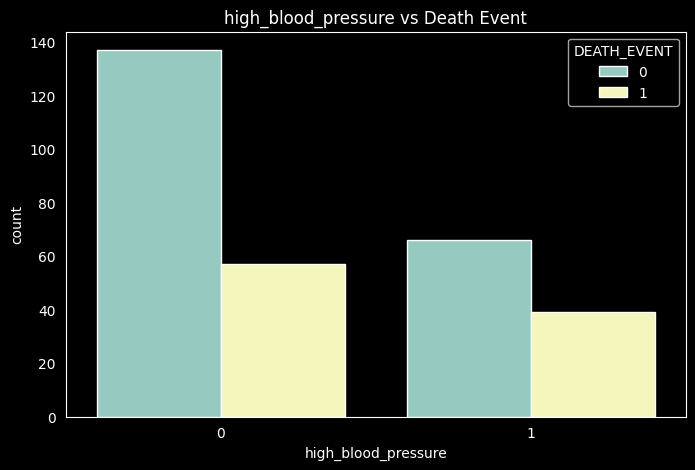

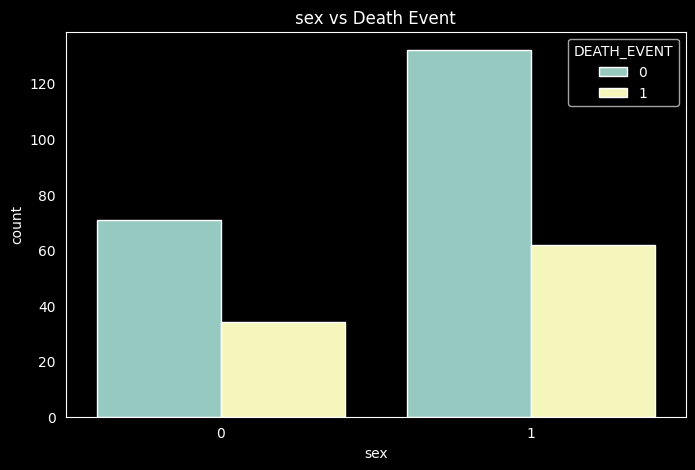

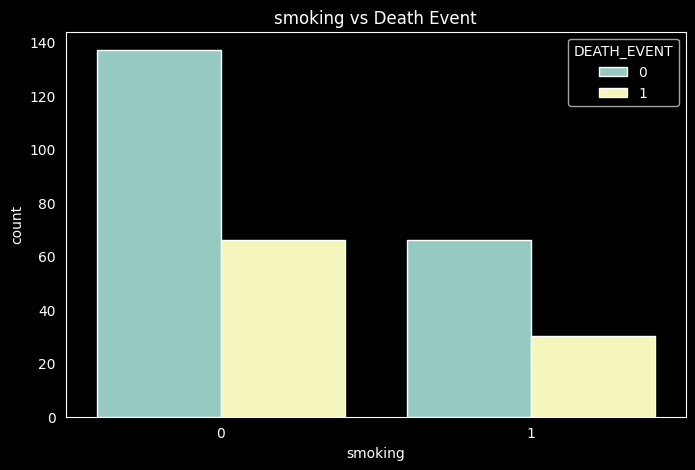

In [16]:
binary_cols = [
    'anaemia', 'diabetes', 'high_blood_pressure',
    'sex', 'smoking'
]

for col in binary_cols:
    sns.countplot(x=col, hue='DEATH_EVENT', data=df)
    plt.title(f'{col} vs Death Event')
    plt.show()

# **🔗 Correlation Heatmap**

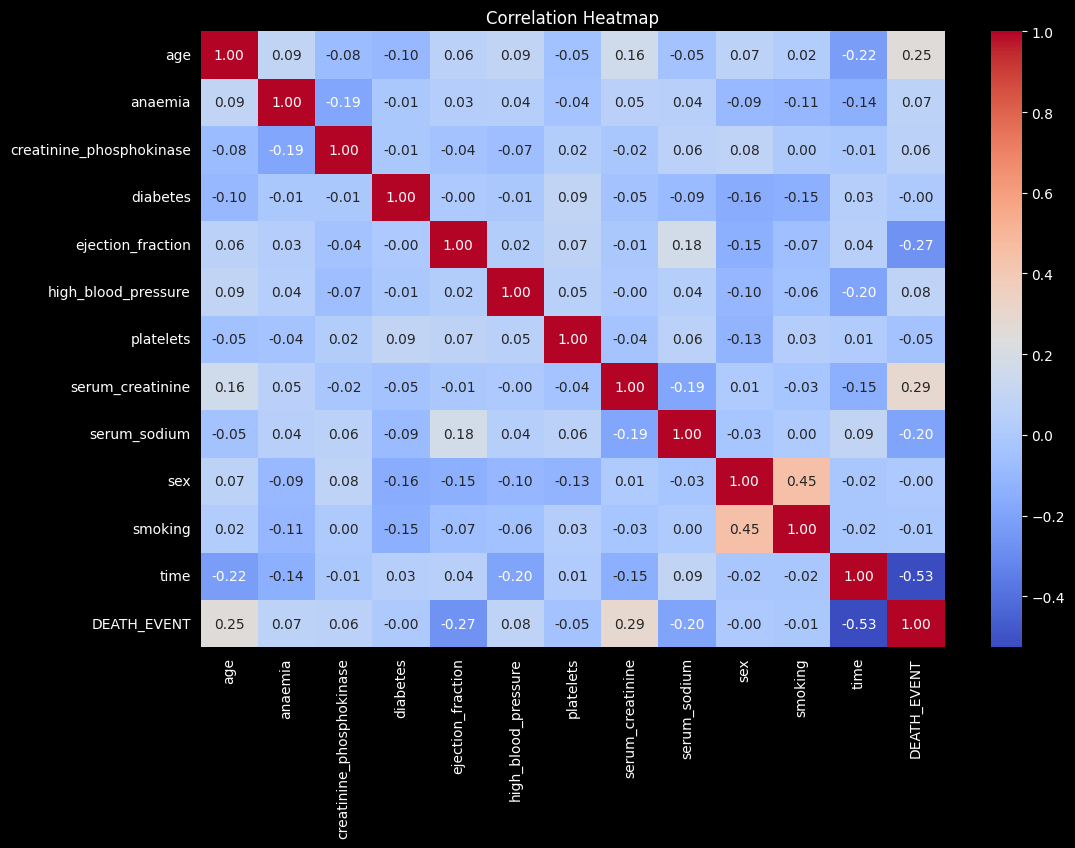

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **🚨 Outlier Detection (Boxplots)**

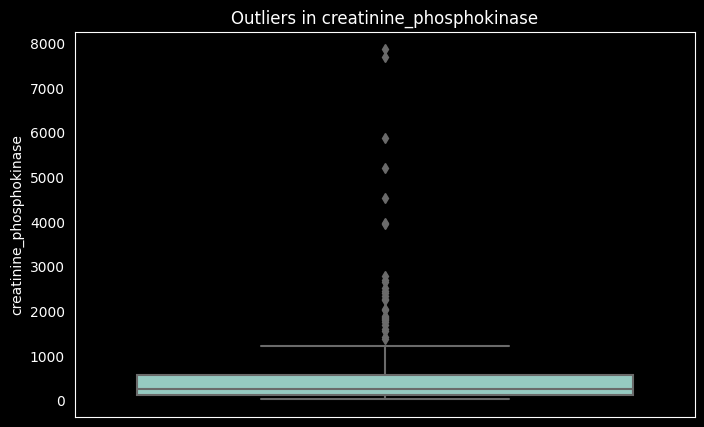

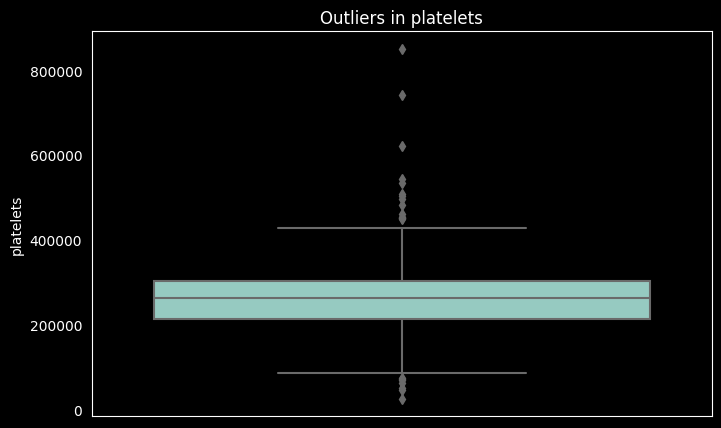

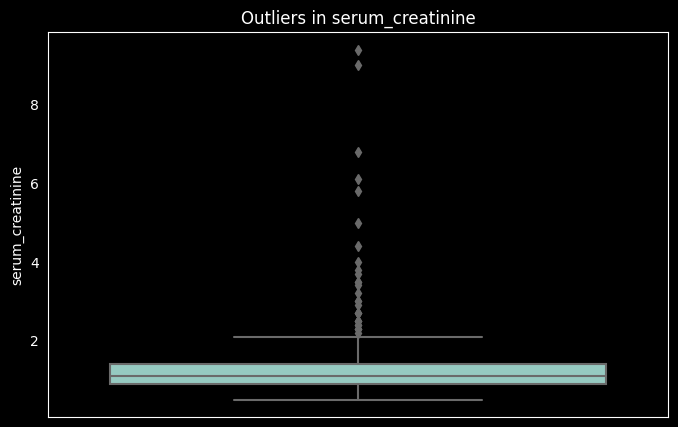

In [18]:
num_cols = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine']

for col in num_cols:
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# **🧠 Machine Learning Pipeline**

# **📦 Import ML Libraries**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# **🎯 Features & Target**

In [21]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# **✂️ Train-Test Split**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# **⚖️ Feature Scaling (For Logistic Regression)**

In [23]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **🧪 Logistic Regression (Baseline Model)**

In [24]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results
Accuracy: 0.8166666666666667
ROC-AUC: 0.858793324775353
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60



# **🌲 Random Forest (Best Model)**

In [25]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results
Accuracy: 0.85
ROC-AUC: 0.8998716302952504
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.86      0.63      0.73        19

    accuracy                           0.85        60
   macro avg       0.85      0.79      0.81        60
weighted avg       0.85      0.85      0.84        60



# **🔍 Feature Importance (Random Forest)**

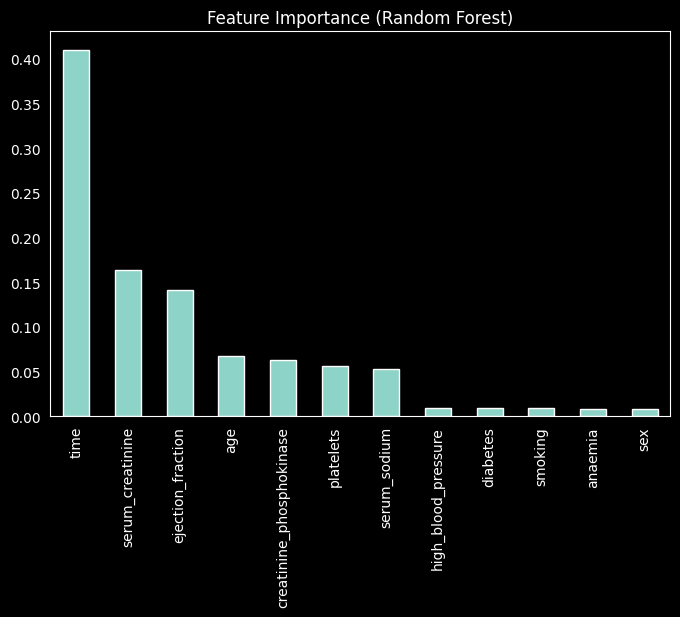

In [26]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.plot(kind='bar', title='Feature Importance (Random Forest)')
plt.show()

# **🏆 Model Comparison Summary**

In [27]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

results


,Model,ROC-AUC
0,Logistic Regression,0.858793
1,Random Forest,0.899872


## **Thank You**

Thank you for taking the time to explore this notebook.  
I hope the **EDA and machine learning analysis** provided clear insights into the Heart Failure Clinical Records dataset.

If you found this work helpful or informative, please consider **sharing your feedback** in the comments.  
Your support and suggestions are always appreciated and help me improve future analyses.

Happy learning and data exploring! 🚀
